### Activate inline plotting

In [27]:
%pylab inline
import sys
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Import Dataset(s)

In [28]:
from hits import AllHits
from tracking import Hough

In [29]:
hit_data = AllHits('../data/signal.root')
print hit_data.n_events

38996


###Define Finding Algorithm

In [30]:
hough = Hough(hit_data)

### Drawing Function(s)

In [31]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   
rhos, phis = hit_data.cydet.get_points_rhos_and_phis()
xs, ys = hit_data.cydet.get_points_xs_and_ys()
t_rhos, t_phis = hough.track.get_points_rhos_and_phis()
t_xs, t_ys = hough.track.get_points_xs_and_ys()

###Check Hough Transform, step by step

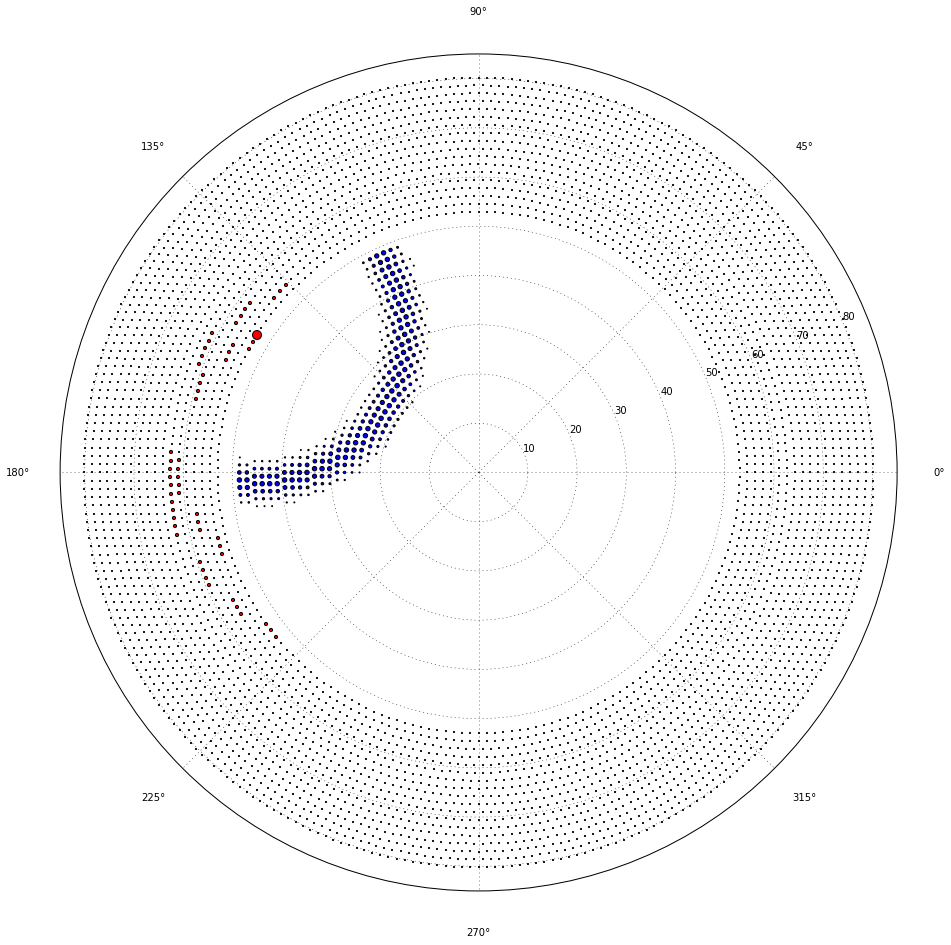

In [55]:
from scipy.sparse import find

evt = 25
sig = hit_data.get_sig_wires(evt)
hits = np.zeros(hit_data.cydet.n_points)

relevant_hits = [sig[0]]
hits[relevant_hits] = 1

hough_matrix = hough.correspondence.T
track_center = hough_matrix.dot(hits) 

possible_center = np.where(track_center != 0)[0]
possible_value = track_center[possible_center]

setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)
scatter(phis[sig],rhos[sig], marker='o', s=10, c='r')
scatter(phis[relevant_hits],rhos[relevant_hits], marker='o', s=80, c='r')
scatter(t_phis[possible_center],t_rhos[possible_center], possible_value*100, marker='o', c='b')

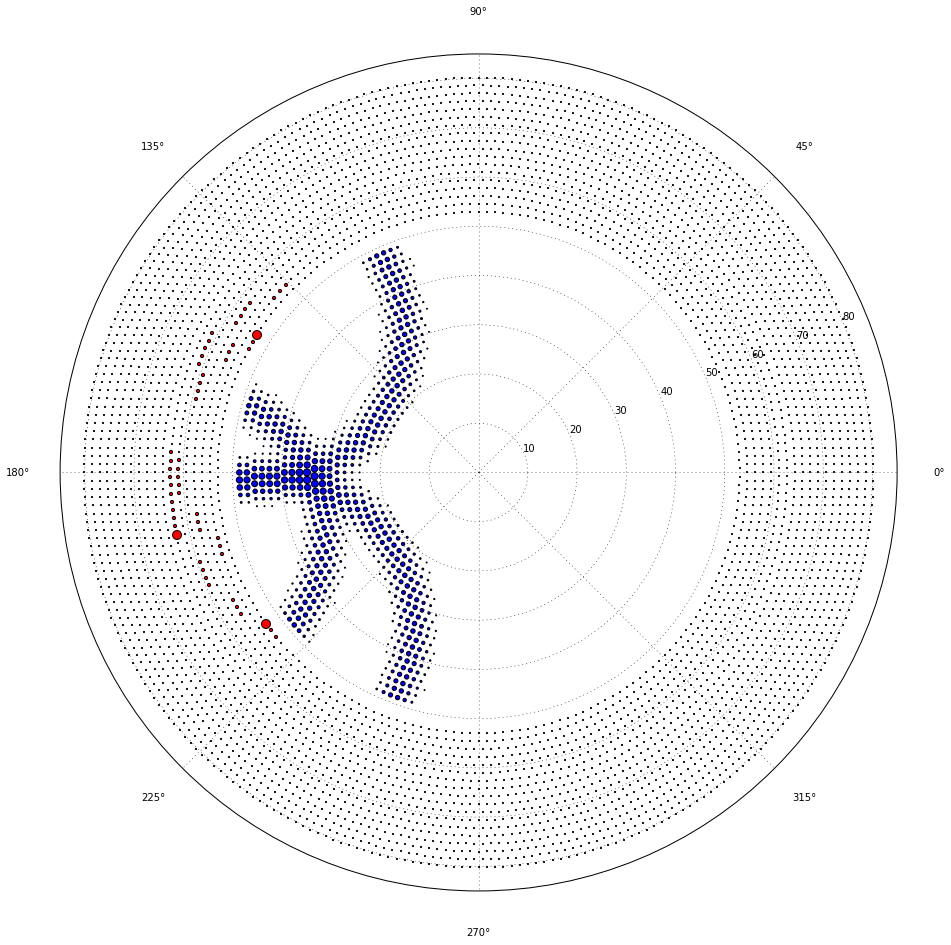

In [56]:
relevant_hits = [sig[0], sig[-1], sig[3]]
hits[relevant_hits] = 1

track_center = hough_matrix.dot(hits) 
possible_center = np.where(track_center != 0)[0]
possible_value = track_center[possible_center]

setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)
scatter(phis[sig],rhos[sig], marker='o', s=10, c='r')
scatter(phis[relevant_hits],rhos[relevant_hits], marker='o', s=80, c='r')
scatter(t_phis[possible_center],t_rhos[possible_center], possible_value*100, marker='o', c='b')

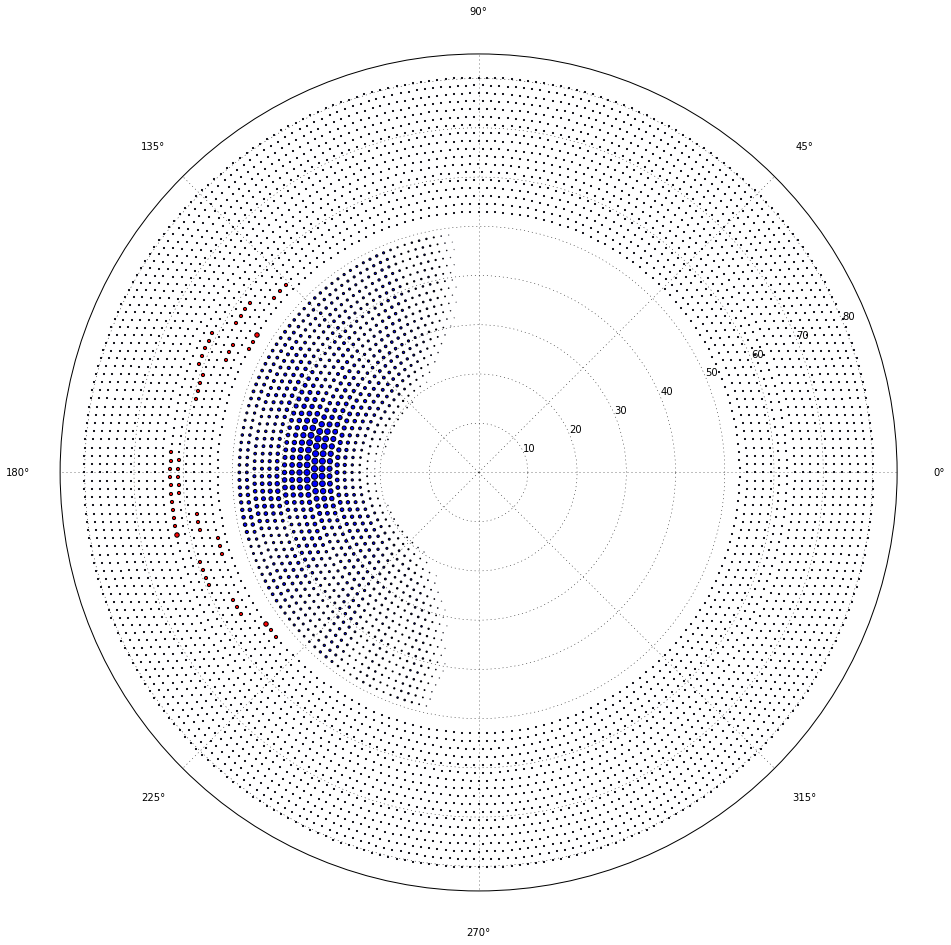

In [57]:
sig = hit_data.get_sig_wires(evt)
hough_matrix = hough.correspondence.T
track_center = hough_matrix.dot(hit_data.get_hit_vector(evt))

possible_center = np.where(track_center != 0)[0]
possible_value = track_center[possible_center]

setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)
scatter(phis[sig],rhos[sig], marker='o', s=10, c='r')
scatter(phis[relevant_hits],rhos[relevant_hits], marker='o',c='r')
scatter(t_phis[possible_center],t_rhos[possible_center], possible_value*5, marker='o', c='b')

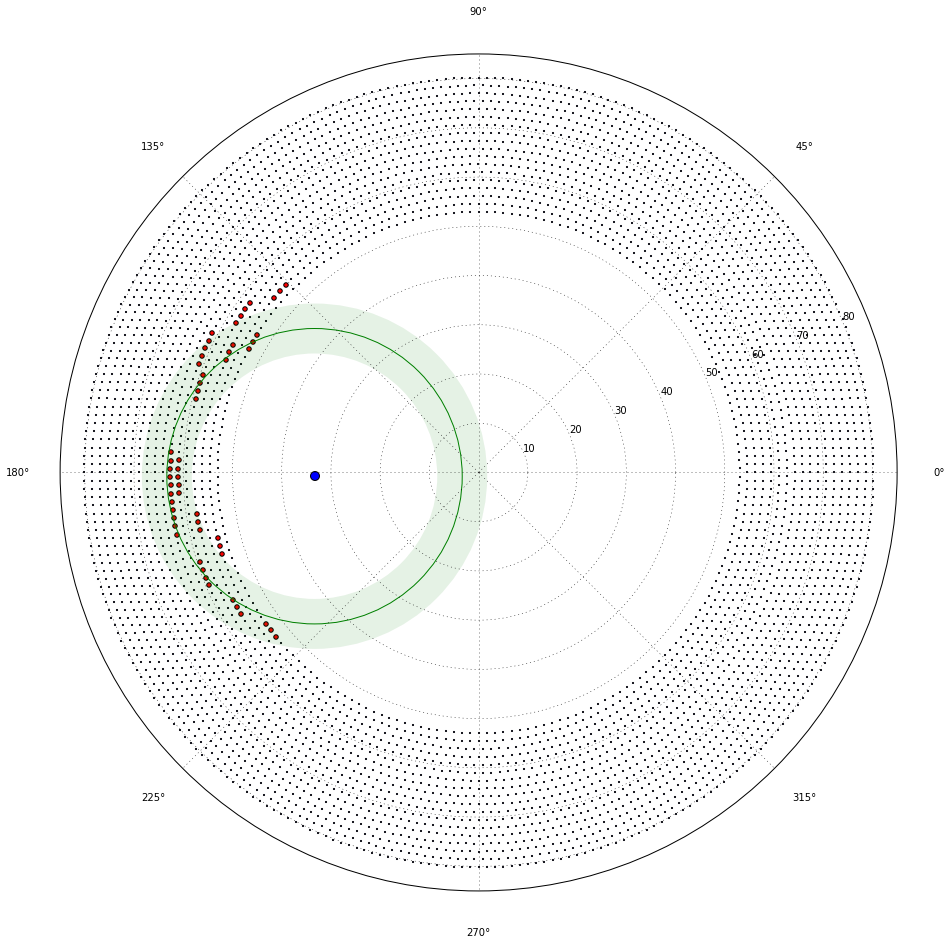

In [58]:
track_center = hough_matrix.dot(hit_data.get_hit_vector(evt))
center = np.where(track_center == max(track_center))[0]


setup_plot_for_detector()
ax = plt.subplot(111, polar=True)
ax.scatter(phis, rhos, marker='.', s=5)
ax.scatter(t_phis[center],t_rhos[center],s=80, marker='o', c='b') 
ax.scatter(phis[sig],rhos[sig], marker='o', c='r')


target_radius = plt.Circle((t_xs[center], t_ys[center]), hough.sig_rho, \
                           transform=ax.transData._b, color="green", fill=False,)
target_spread = plt.Circle((t_xs[center], t_ys[center]), hough.sig_rho, \
                           transform=ax.transData._b, color="green", alpha=0.1, fill=False, lw=10*hough.sig_trk_smear)
gca().add_artist(target_radius)
gca().add_artist(target_spread)

### Check Even/Odd Hough Fit

31 23


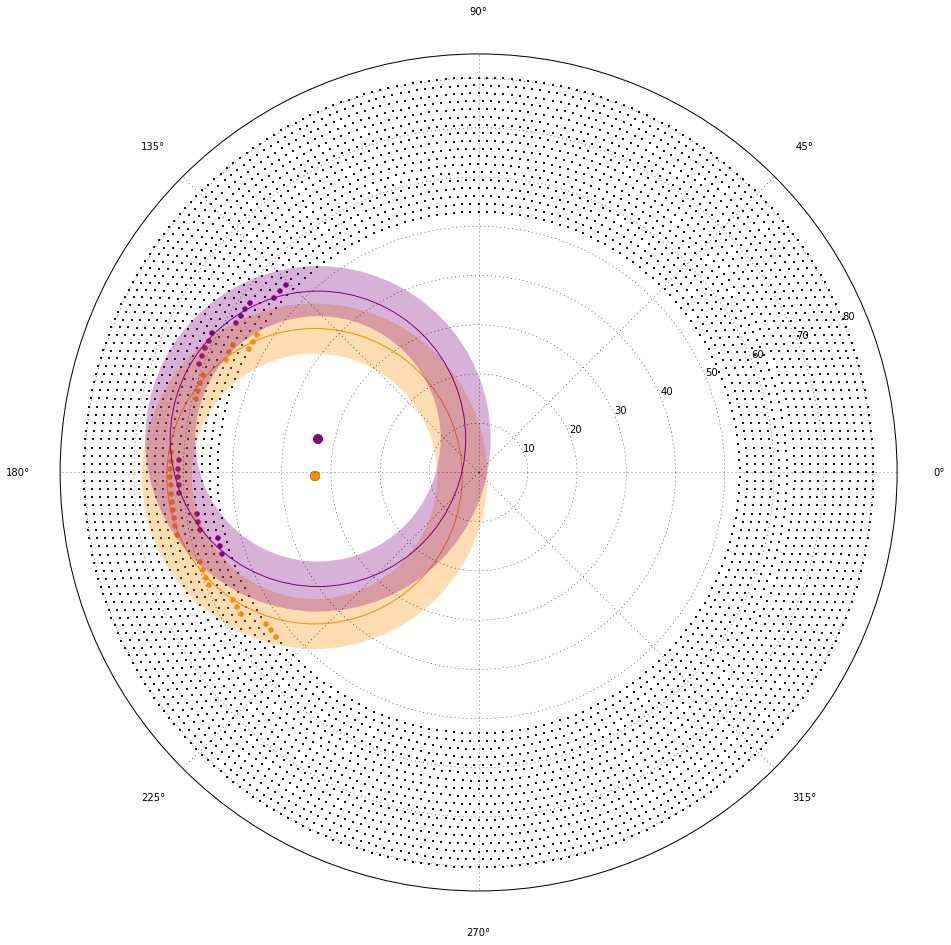

In [60]:
even_sig, odd_sig = hit_data.get_hit_wires_even_odd(evt)
even_sig = np.intersect1d(even_sig, sig)
odd_sig = np.intersect1d(odd_sig, sig)

even_hit_vector, odd_hit_vector = hit_data.get_hit_vector_even_odd(evt)

print len(even_sig), len(odd_sig)

## Start with Even Layer
track_center_even = hough_matrix.dot(even_hit_vector)
center_even = np.where(track_center_even == max(track_center_even))[0]

## Do odd layer
track_center_odd = hough_matrix.dot(odd_hit_vector)
center_odd = np.where(track_center_odd == max(track_center_odd))[0]

# PLOT
setup_plot_for_detector()
ax = plt.subplot(111, polar=True)
ax.scatter(phis, rhos, marker='.', s=5)
ax.scatter(t_phis[center],t_rhos[center],s=80, marker='o', c='b') 


#Even layer
ax.scatter(t_phis[center_even],t_rhos[center_even],s=80, marker='o', color='darkorange') 
ax.scatter(phis[even_sig],rhos[even_sig], marker='o', color='darkorange')
target_radius_even = plt.Circle((t_xs[center_even], t_ys[center_even]), hough.sig_rho, \
                           transform=ax.transData._b, color='darkorange', fill=False,)
target_spread_even = plt.Circle((t_xs[center_even], t_ys[center_even]), hough.sig_rho, \
                           transform=ax.transData._b, color='darkorange', alpha=0.3, fill=False, lw=10*hough.sig_trk_smear)
gca().add_artist(target_radius_even)
gca().add_artist(target_spread_even)


#Odd layer
ax.scatter(t_phis[center_odd],t_rhos[center_odd],s=80, marker='o', color='purple') 
ax.scatter(phis[odd_sig],rhos[odd_sig], marker='o', color='purple')
target_radius_odd = plt.Circle((t_xs[center_odd], t_ys[center_odd]), hough.sig_rho, \
                           transform=ax.transData._b, color="purple", fill=False,)
target_spread_odd = plt.Circle((t_xs[center_odd], t_ys[center_odd]), hough.sig_rho, \
                           transform=ax.transData._b, color="purple", alpha=0.3, fill=False, lw=10*hough.sig_trk_smear)
gca().add_artist(target_radius_odd)
gca().add_artist(target_spread_odd)